In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from scipy.optimize import curve_fit

In [2]:
Cricket_data=pd.read_csv('04_cricket_1999to2011.csv')
df = Cricket_data.copy()

In [3]:
#b=0.035
def run_prediction_func1(u,z,b):
    return z*(1-np.exp(-b*u))

In [4]:
def run_prediction_func2(u,z,l):
    return z*(1-np.exp(-l*u))

In [5]:
#Cleaning of Data
#Dropping 2nd innings data
df.drop(df.index[(df["Innings"]>1)],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
#Note: we have to reindex the data after dropping rows

#Dropping rows where Error.in.data column is 1
for i, rowi in df.iterrows():
    error=rowi['Error.In.Data']
    if(error==1):
        df.drop(df.index[i],axis=0,inplace=True)
            
df.reset_index(drop=True, inplace=True)
#Note: we have to reindex the data after dropping rows
df = df[['Match','Innings.Total.Runs','Total.Runs','Runs.Remaining','Over','Total.Overs','Wickets.in.Hand','Runs']]
df['Remaining_overs'] = df['Total.Overs'] - df['Over']

#As there is some error in Runs.Remaining column, hence we will calculate it again.
df['Runs_scored_u_w']= df['Innings.Total.Runs'] - df['Total.Runs']
df = df[['Match','Remaining_overs','Wickets.in.Hand','Runs_scored_u_w','Over']]
#df

In [6]:
Remaining_overs_1=df['Remaining_overs'].values
Wickets_in_Hand_1=df['Wickets.in.Hand'].values
Runs_scored_u_w_1	=df['Runs_scored_u_w'].values

In [7]:
#Using Dictionary of Dictionary, and storing the information of every match w.r.t to first occurence of every wicket in data.
overs_left_average = { }
for i, rowi in df.iterrows():
    
    if(rowi['Wickets.in.Hand'] in overs_left_average):
        if (rowi['Match'] in overs_left_average[rowi['Wickets.in.Hand']]):
            pass
        else:
            overs_left_average[rowi['Wickets.in.Hand']][rowi['Match']]=rowi['Runs_scored_u_w']
    else:
        overs_left_average[rowi['Wickets.in.Hand']] = {}
        overs_left_average[rowi['Wickets.in.Hand']][rowi['Match']]=rowi['Runs_scored_u_w']
    
#converting our dictionary to data frame, the Null values in data shows that match has completed without losing any more wicket
#also here we have some anamoly in data, as few matches details are there when 8 or 7 wickets are left, that is why we can see null values in between.
new = pd.DataFrame.from_dict(overs_left_average)
#Finding mean of no. of runs scored w.r.t no. of wickets in hand.
means=new.mean(skipna=True)



In [8]:
#Using Dictionary of Dictionary, and storing the information of every match w.r.t to no. of overs in hand.
def Overs_calculate(z):
    Average_runs_perover= { }

    for i, rowi in df.iterrows():
    #print(rowi['Remaining_overs'])
        if(rowi['Wickets.in.Hand']==z):
            if(rowi['Remaining_overs'] in Average_runs_perover):
                if (rowi['Match'] in Average_runs_perover[rowi['Remaining_overs']]):
                    pass
                else:
                    Average_runs_perover[rowi['Remaining_overs']][rowi['Match']]=rowi['Runs_scored_u_w']
            else:
                Average_runs_perover[rowi['Remaining_overs']] = {}
                Average_runs_perover[rowi['Remaining_overs']][rowi['Match']]=rowi['Runs_scored_u_w']
      
  #converting our dictionary to data frame, the Null values in data shows that match has completed without losing any more wicket
  #also here we have some anamoly in data, as few matches details are there when 8 or 7 wickets are left, that is why we can see null values in between.
    new_2 = pd.DataFrame.from_dict(Average_runs_perover)
  #print(new_2)
  #Finding mean of no. of runs scored w.r.t no. of overs to go.
    means1=new_2.mean(skipna=True)
    Runs_scored_u_w	=means1.values
    Remaining_overs=means1.index.values

  #print(means1)
  #average_z=means[z]
  #print(means[z])
  # print(means1[49])
  # print(means1)

    return Runs_scored_u_w,Remaining_overs

In [9]:
def DuckworthLewis20Params():
    Z=[]
    b=[]
    total_error=0
    for i in range(1,11):
        Runs_scored_u_w,Remaining_overs=Overs_calculate(i)
        p=[means[i],0.035]
        total_error+=error
        optimized_p,covar= curve_fit(run_prediction_func1,Remaining_overs,Runs_scored_u_w,p)
        Z.append(optimized_p[0])
        b.append(optimized_p[1])
    
    #print(optimized_p)
    #print(covar)
  # print("Total error",total_error)
    return Z,b


In [10]:
Z0, b = DuckworthLewis20Params()
stacked_array = np.vstack((Z0, b))
#Z0


In [ ]:
# print(Z0)
# print(b)

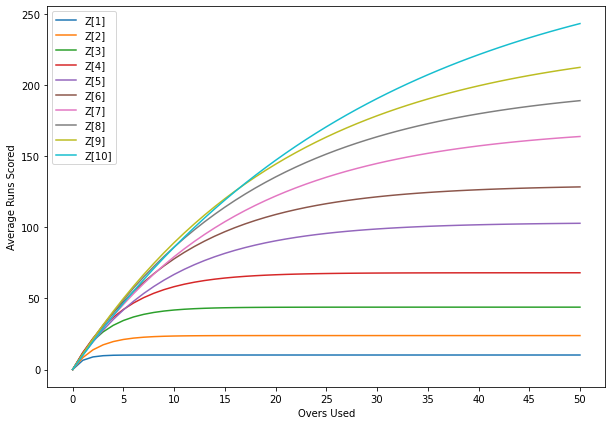

In [11]:
#u,z,b
#Reqd. graph of average runs with respect to overs used
plt.figure(figsize=(10,7))
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.yticks([0,50,100,150,200,250,300])
plt.xlabel('Overs Used')
plt.ylabel('Average Runs Scored')
x=np.arange(0,51,1)
for i in range(10):
    y=run_prediction_func1(x,stacked_array[0][i],stacked_array[1][i])
    plt.plot(x,y, label='Z['+str(i+1)+']')
    plt.legend()

In [12]:
df1 = Cricket_data.copy()
#df1

In [13]:
#Checking the conditions for cleaning our data
Innings1=df1[df1['Innings'] == 1]
Innings1=Innings1[Innings1['Runs.Remaining']>0]
Innings1=Innings1[Innings1['Wickets.in.Hand']>0]
Innings1=Innings1[Innings1['Wickets.in.Hand']<11]

In [14]:
runs_remaining=Innings1['Runs.Remaining'].values
total_overs=Innings1['Total.Overs'].values
overs_remaining=50-Innings1['Over'].values
wickets_remaining=Innings1['Wickets.in.Hand'].values
X1=np.vstack((overs_remaining,wickets_remaining))
X1=X1.T
X2data = runs_remaining

In [15]:
#using curve fit method
def fun(u,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,l):
    y=[]
    x_1=(u[1])
    x_2=(u[2])
    for x3 in u:
        if(x3[1]==1):
            y.append(run_prediction_func2(x3[0],z1,l))
        if(x3[1]==2):
            y.append(run_prediction_func2(x3[0],z2,l))
        if(x3[1]==3):
            y.append(run_prediction_func2(x3[0],z3,l))
        if(x3[1]==4):
            y.append(run_prediction_func2(x3[0],z4,l))
        if(x3[1]==5):
            y.append(run_prediction_func2(x3[0],z5,l))
        if(x3[1]==6):
            y.append(run_prediction_func2(x3[0],z6,l))
        if(x3[1]==7):
            y.append(run_prediction_func2(x3[0],z7,l))
        if(x3[1]==8):
            y.append(run_prediction_func2(x3[0],z8,l))
        if(x3[1]==9):
            y.append(run_prediction_func2(x3[0],z9,l))
        if(x3[1]==10):
            y.append(run_prediction_func2(x3[0],z10,l))
    #print(y)
    #print(len(y))
    return y


In [16]:
#Taking some initial values for our parameters
initial_p = [20.0,45.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,240.0,10.0] 

In [17]:
#optimization
#u,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,l
def DuckworthLewis11Params():
    
    optimized_p,covar=curve_fit(fun,X1,X2data,initial_p)
    print(optimized_p)
    p = optimized_p
    Z0 = [p[0], p[1], p[2], p[3],p[4],p[5],p[6],p[7],p[8],p[9]]
    L=p[10]
    return Z0,L

# print(optimized_p)
# print(covar)

In [18]:
Z0, L = DuckworthLewis11Params()

<ipython-input-4-fea82bb1864d>:2: RuntimeWarning: overflow encountered in exp
  return z*(1-np.exp(-l*u))


[2.82173123e+01 5.23840012e+01 8.39792233e+01 1.12536579e+02
 1.32019060e+02 1.56531482e+02 1.75431057e+02 1.99309859e+02
 2.20037686e+02 2.49523264e+02 5.85157628e-02]


In [ ]:
#Z0

In [ ]:
#L